In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MC15ri

# D+ -> (eta -> gg) pi+

In [80]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_gg/pre_sel_treefit_240310/'
file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
# base_filter=' Dp_M>0'
base_filter= ' ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
base_filter += ' && ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 && etapip_Eta_daughterAngle_0_1<1.7 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '
base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
base_filter += ' && dM_pi0_75MeV>0.011 && dM_pi0_75MeV_2>0.011'
base_filter += ' && Pip_pionID > 0.6'
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz',]
             #'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             #'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask']

Dp_gg   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
Dp_gg_true = Dp_gg.query('Dp_isSignal==1')
Dp_gg_false = Dp_gg.query('Dp_isSignal!=1')


runtime_error: string ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnType(basic_string_view<char,char_traits<char> > column) =>
    runtime_error: Column "etapip_Eta_cosHel_0" is not in a dataset and is not a custom column been defined.

## D+M

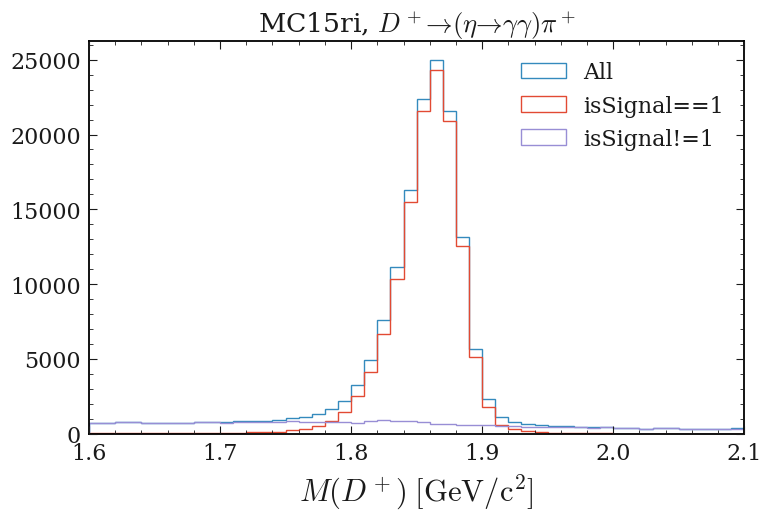

In [26]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'Dp_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_DpM_presel_treefit.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



## Dp_cosAngleBetweenMomentumAndVertexVector

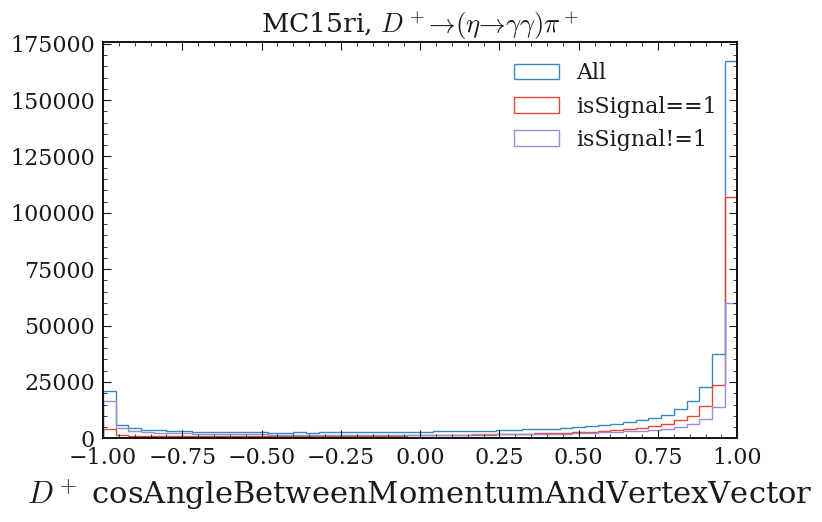

In [6]:
xrange = (-1,1,51)
xm = np.linspace(*xrange)
var = 'Dp_cosAngleBetweenMomentumAndVertexVector'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Dp_cosAngle_presel_treefit.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$D^+$ cosAngleBetweenMomentumAndVertexVector'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



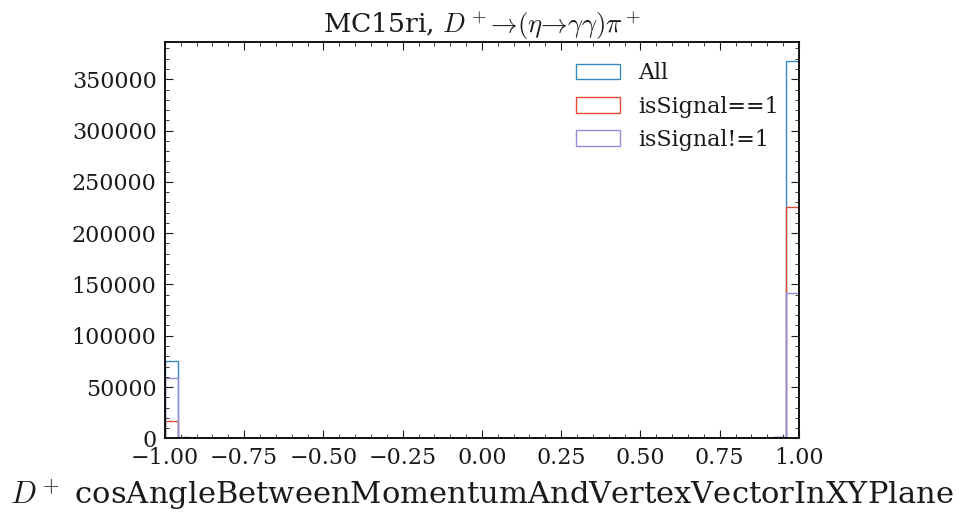

In [7]:
xrange = (-1,1,51)
xm = np.linspace(*xrange)
var = 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Dp_cosAngle_InXY_presel_treefit.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$D^+$ cosAngleBetweenMomentumAndVertexVectorInXYPlane'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



## Dp_acos_cosAngleBetweenMomentumAndVertexVector

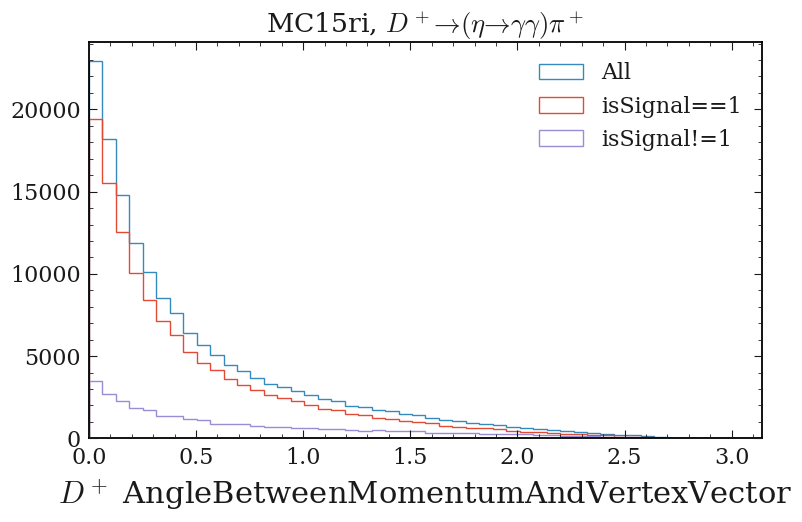

In [27]:
pi = math.pi
xrange = (0,pi,51)
xm = np.linspace(*xrange)
var = 'Dp_acos_cosAngleBetweenMomentumAndVertexVector'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Dp_Angle_presel_treefit.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$D^+$ AngleBetweenMomentumAndVertexVector'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



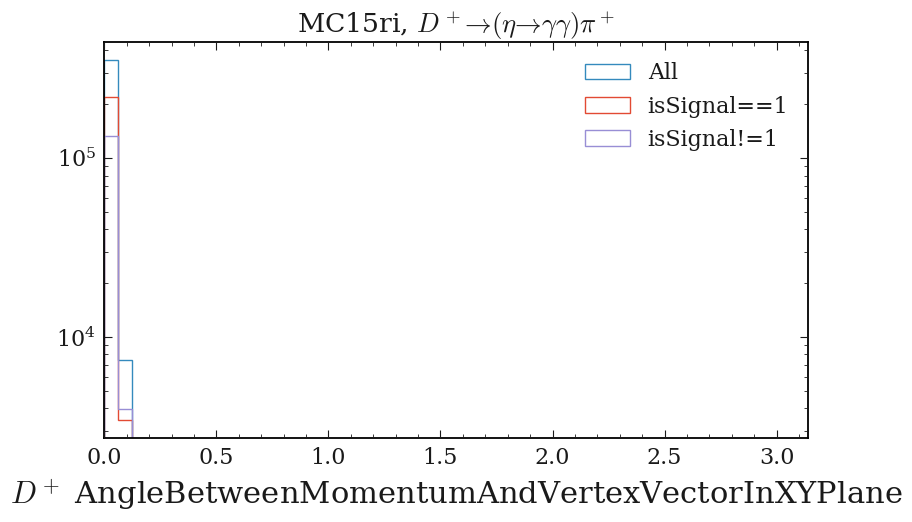

In [22]:
xrange = (0,pi,51)
xm = np.linspace(*xrange)
var = 'Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane'
plot_title = r'MC15ri, $D^+ \to (\eta \to \gamma \gamma) \pi^+$'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg'
file_path=img_path + '/mc15ri_etapip_gg_1M_Dp_Angle_InXY_presel_treefit.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_gg[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_gg_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_gg_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$D^+$ AngleBetweenMomentumAndVertexVectorInXYPlane'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.yscale('log')
plt.tight_layout()
plt.savefig(file_path)



# D+ -> (eta -> pi+ pi- pi0) pi+

In [74]:
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_sel_treefit_240310/'
file = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/pre_sel_treefit_240310_kfiteta/'

file += '*.root'
# base_filter=' D0_M>1.68 && D0_M<2.0'
base_filter=' Dp_M>0'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 &&  etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapipe_pi0_gamma1_p>0.1 && etapip_pi0_gamma2_p>0.1'

base_filter += ' && ((etapip_pi0_gamma1_clusterReg==1 && etapip_pi0_gamma1_E>0.05) || (etapip_pi0_gamma1_clusterReg==3 && etapip_pi0_gamma1_E>0.075) || (etapip_pi0_gamma1_clusterReg==2 && etapip_pi0_gamma1_E>0.05))'
base_filter += ' && ((etapip_pi0_gamma2_clusterReg==1 && etapip_pi0_gamma2_E>0.05) || (etapip_pi0_gamma2_clusterReg==3 && etapip_pi0_gamma2_E>0.075) || (etapip_pi0_gamma2_clusterReg==2 && etapip_pi0_gamma2_E>0.05))'
base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
base_filter += ' && Pip_pionID > 0.6'
base_filter += ' && eta_Pi0_daughterAngle_0_1<1.4 && abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5'
base_filter += ' && eta_Pi0_M>0.120'
#base_filter += ' && eta_Pi0_p>0.4'

base_filter += ' && etapip_Eta_M>0.535 && etapip_Eta_M<0.56'
#base_filter += ' && eta_Pim_pionID > 0.6 && eta_Pip_pionID > 0.6'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '
# base_filter+= ' && eta_Pi0'
base_filter += ' && etapip_Eta_p>1'

tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_chiProb','Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits','etapip_pi0_gamma1_clusterE9E21','etapip_pi0_gamma2_clusterE9E21',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1","eta_Pi0_Easym",'eta_Pi0_isSignal',\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionID','Pip_mcPDG','Pip_dr','Pip_dr']

Dp_pipipi   = get_pd(file=file , tree=tree, variables=variables ,base_filter=base_filter)
Dp_pipipi_true = Dp_pipipi.query('Dp_isSignal==1')
Dp_pipipi_false = Dp_pipipi.query('Dp_isSignal!=1')


## D+M

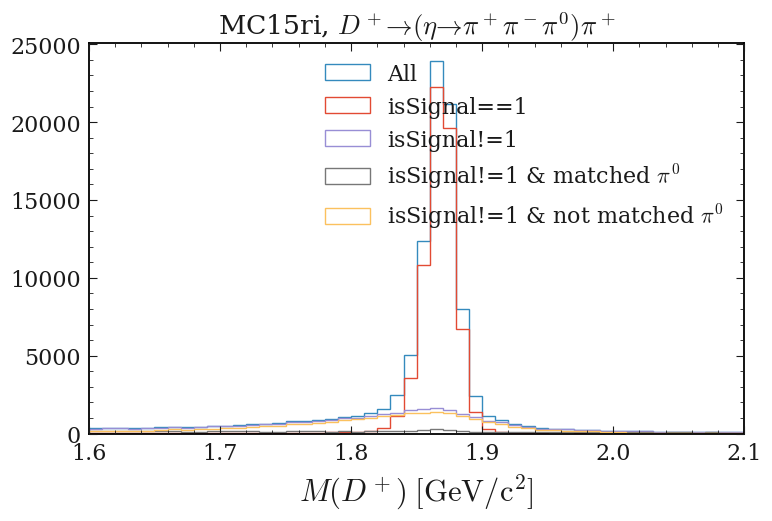

In [78]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'Dp_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_gg_1M_DpM_presel_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step')

plt.hist(Dp_pipipi_false.query('eta_Pi0_isSignal==1')[var], label='isSignal!=1 & matched $\pi^0$',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false.query('eta_Pi0_isSignal!=1')[var], label='isSignal!=1 & not matched $\pi^0$',bins=xm,  histtype='step') 


ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



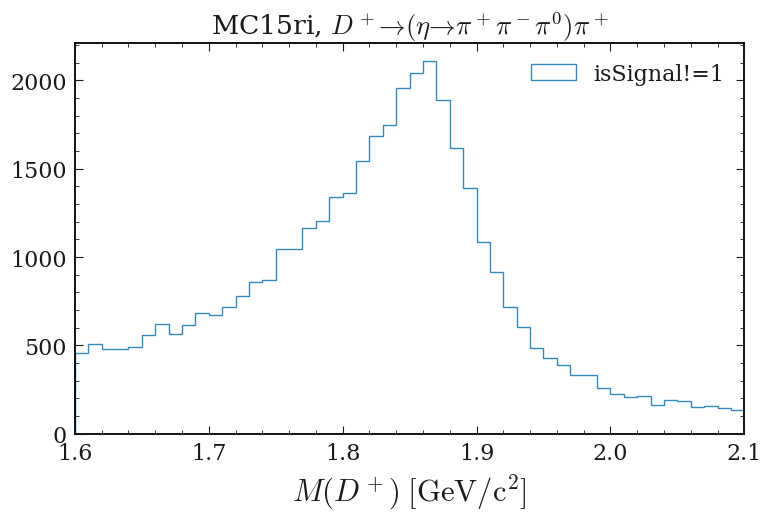

In [50]:
xrange = (1.60,2.1,51)
xm = np.linspace(*xrange)
var = 'Dp_M'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_gg_1M_DpM_presel_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

#plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
#plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig(file_path)



## etapip_pi0_gamma1_clusterE9E2

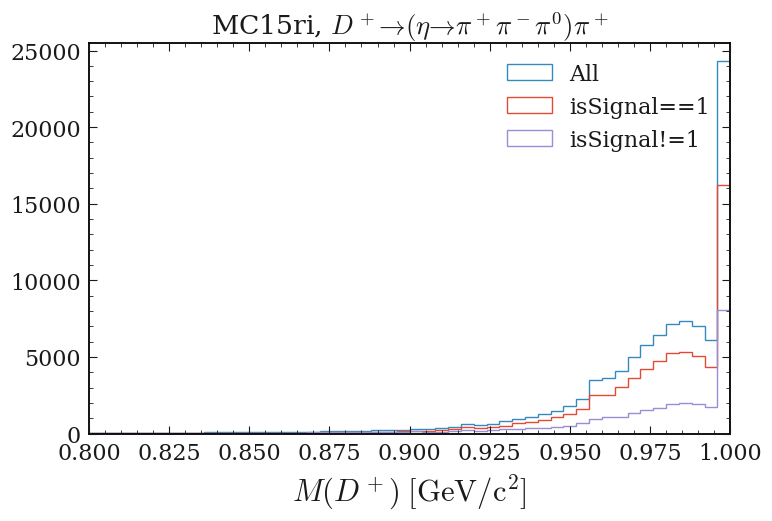

In [79]:
xrange = (0.8,1,51)
xm = np.linspace(*xrange)
var = 'etapip_pi0_gamma1_clusterE9E21'
plot_title = r'MC15ri, $D^+ \to (\eta \to \pi^+ \pi^- \pi^0) \pi^+$'
# img_path='/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_signal/Dpetapip_gg'
img_path='/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/3pi'

file_path=img_path + '/mc15ri_etapip_gg_1M_DpM_presel_study.png'

# Extract the directory from the file path
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

plt.hist(Dp_pipipi[var], label='All',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_true[var], label='isSignal==1',bins=xm,  histtype='step') 
plt.hist(Dp_pipipi_false[var], label='isSignal!=1',bins=xm,  histtype='step') 

ax = plt.gca()
ax.set_xlim(xrange[0],xrange[1])   
xlabel = r'$M(D^+)\; [\mathrm{GeV/c^2}] $'
ax.set_xlabel(xlabel)
plt.title(plot_title)
#plt.axvline(x=1.0395,  color='red', linestyle='dotted')
#plt.axvline(x=0.9995,  color='red', linestyle='dotted')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(file_path)

